<font size='8'>Exploratory Data Analysis</font>

Exploratory data analysis on Sample Superstore

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<font size='5'> Input data</font>

In [2]:
sample=pd.read_csv(r'C:\Users\Brillia\Downloads\SampleSuperstore.csv')
sample

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
#Statistics
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<font size='4'>The maximum profit on a single sale is $8399.976</font>

<font size='5'>Data Cleaning</font>

In [4]:
#removing duplicates
sample.shape

(9994, 13)

In [5]:
sample.drop_duplicates(keep= 'first',inplace=True)
sample.shape

(9977, 13)

In [6]:
sales=sample.groupby("State").Sales.sum()
profit=sample.groupby("State").Profit.sum()

<font size='5'>Let us compare sales of each state</font>

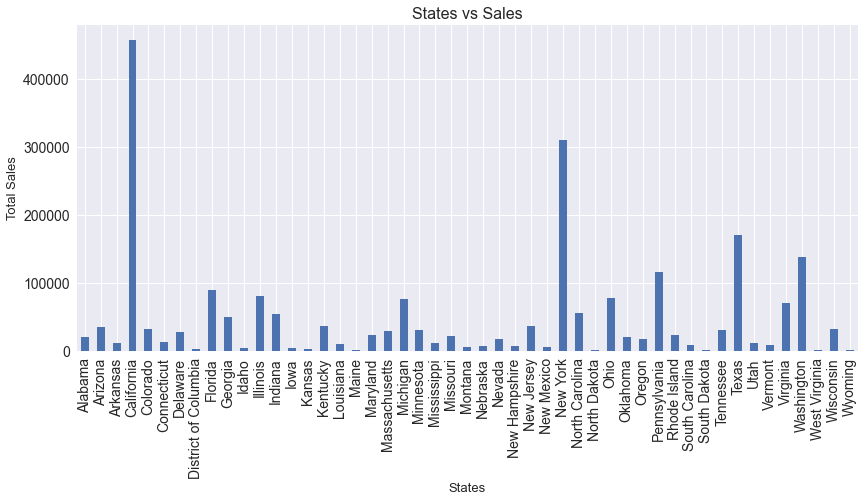

In [7]:
plt.style.use('seaborn')
sales.plot(kind ='bar', figsize =(14,6), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("States vs Sales",fontsize =16)
plt.show()

<font size='5'>Let us examine top 10 states with highest sales</font>

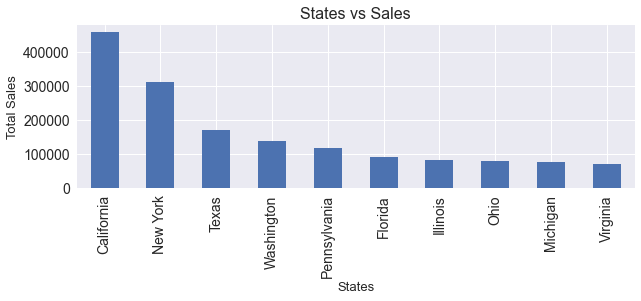

In [8]:
sales1=sample.groupby("State").Sales.sum().nlargest(n =10)
plt.style.use('seaborn')
sales1.plot(kind ='bar', figsize =(10,3), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("States vs Sales",fontsize =16)
plt.show()

<font size='5'>Let us compare profit of each state</font>

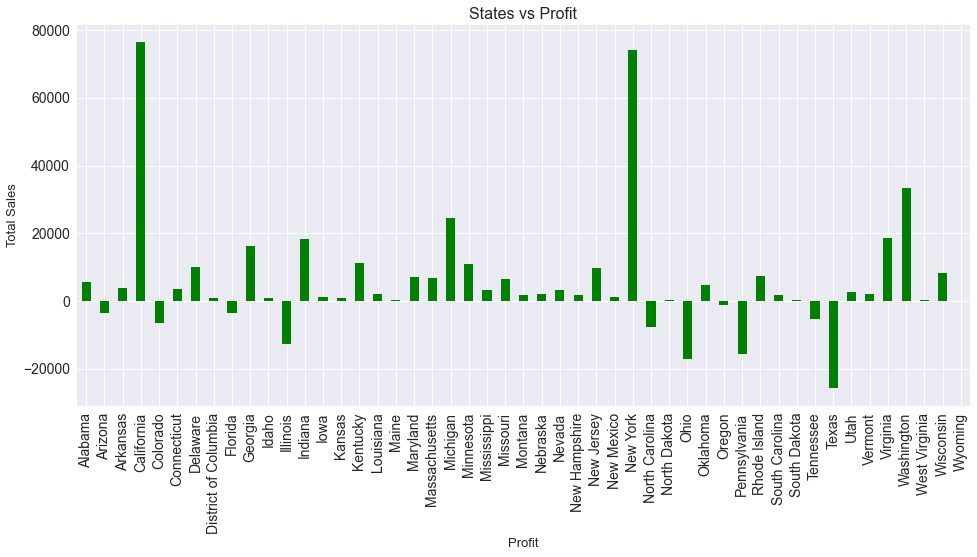

In [9]:
plt.style.use('seaborn')
profit.plot(kind ='bar', figsize =(16,7), fontsize =14,color='green')
plt.xlabel("Profit", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("States vs Profit",fontsize =16)
plt.show()

<font size='5'>Let us examine top 10 states with highest profit</font>

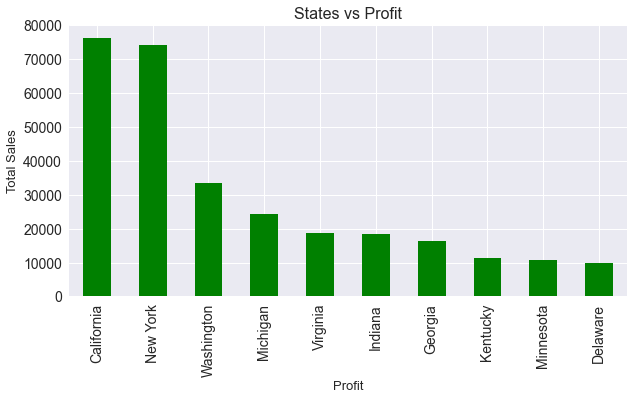

In [10]:
profit1=sample.groupby("State").Profit.sum().nlargest(n =10)
plt.style.use('seaborn')
profit1.plot(kind ='bar', figsize =(10,5), fontsize =14,color='green')
plt.xlabel("Profit", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("States vs Profit",fontsize =16)
plt.show()

<font size='4'>California has the highest sales and profits followed by New York.</font>

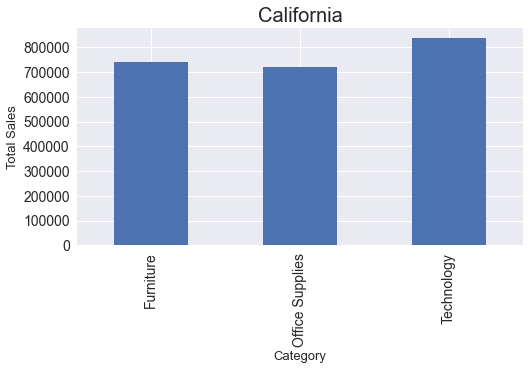

In [11]:
#California sales split up
salesC=sample.groupby("Category",'State'=='California').Sales.sum()
plt.style.use('seaborn')
salesC.plot(kind ='bar', figsize =(8,4), fontsize =14)
plt.xlabel("Category", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("California",fontsize =20)
plt.show()

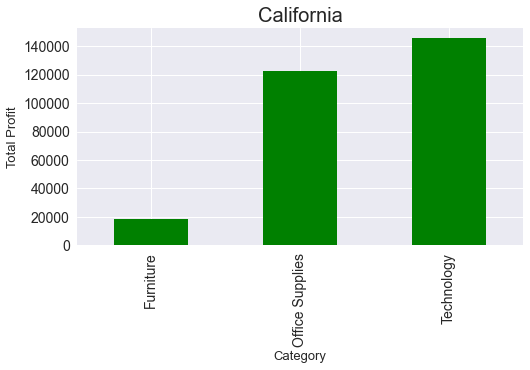

In [12]:
#California profit split up
profitC=sample.groupby("Category",'State'=='California').Profit.sum()
plt.style.use('seaborn')
profitC.plot(kind ='bar', figsize =(8,4), fontsize =14,color='green')
plt.xlabel("Category", fontsize =13)
plt.ylabel("Total Profit",fontsize =13)
plt.title("California",fontsize =20)
plt.show()

<font size='4'>The furniture sector has the lowest profit in California.</font>

<font size='5'>Let us find cities with highest sales.</font>

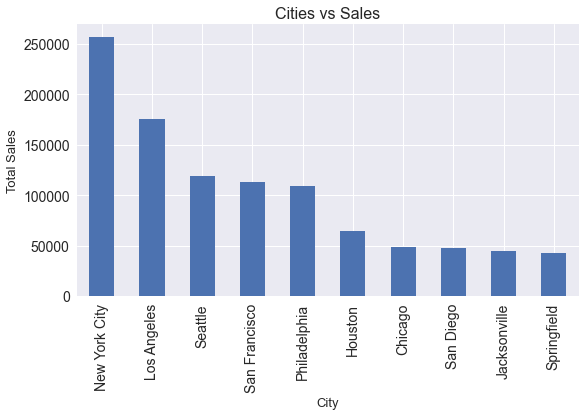

In [13]:
salescities=sample.groupby("City").Sales.sum().nlargest(n =10)
plt.style.use('seaborn')
salescities.plot(kind ='bar', figsize =(9,5), fontsize =14)
plt.xlabel("City", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Cities vs Sales",fontsize =16)
plt.show()

<font size='5'>Let us find cities with highest profit.</font>

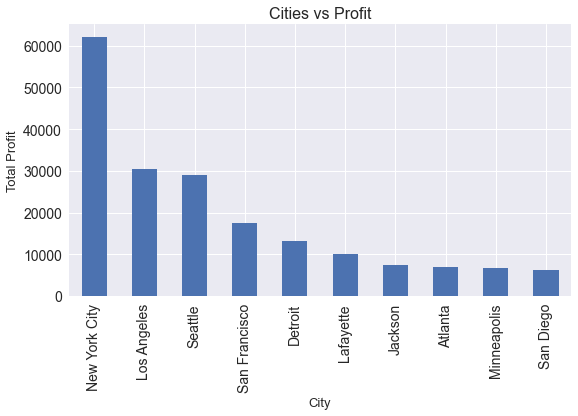

In [14]:
profitcities=sample.groupby("City").Profit.sum().nlargest(n =10)
plt.style.use('seaborn')
profitcities.plot(kind ='bar', figsize =(9,5), fontsize =14)
plt.xlabel("City", fontsize =13)
plt.ylabel("Total Profit",fontsize =13)
plt.title("Cities vs Profit",fontsize =16)
plt.show()

<font size='5'>Let us find the correlation.</font>

<AxesSubplot:>

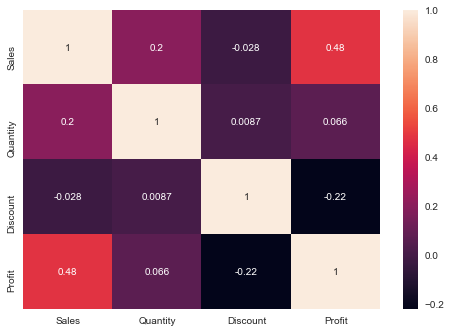

In [15]:
compare=sample.loc[:,['Sales','Quantity','Discount','Profit']]
correlation=compare.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

<font size='4'>Discount and Profit= negatively correlated, 
    Quantity and Profit= slightly positively correlated,
    Sales and profit= positively correlated.</font>

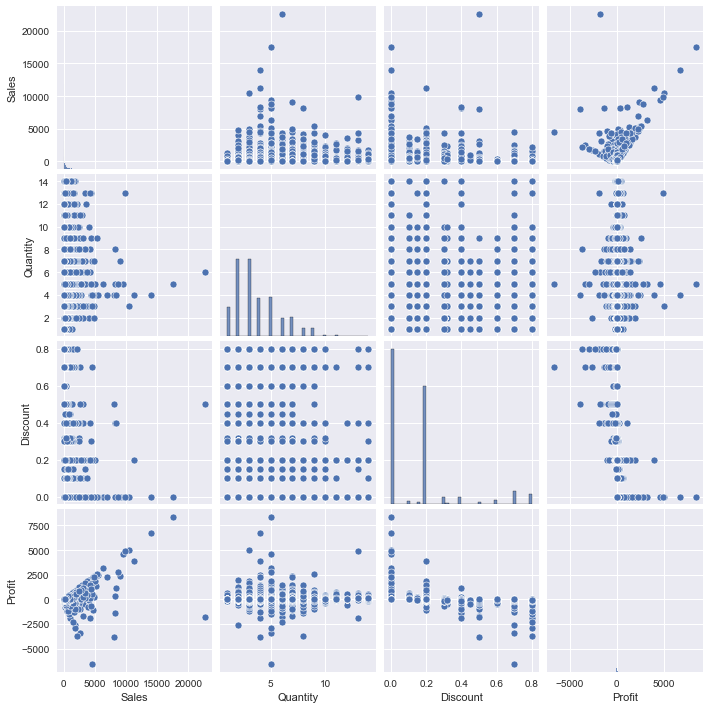

In [18]:
sns.pairplot(compare)

<font size='4'>-From the Sales vs Profit plot we cannot conclude that as number of sales increases there is increase in profit.</font>

<font size='4'>

<font size='4'>-From the Profit vs Discount graph we can conclude that the profit is maximum when the discount is minimum and a discount nearly above 30% results in loss.</font>

<font size='5'>Most selling product</font>

<AxesSubplot:>

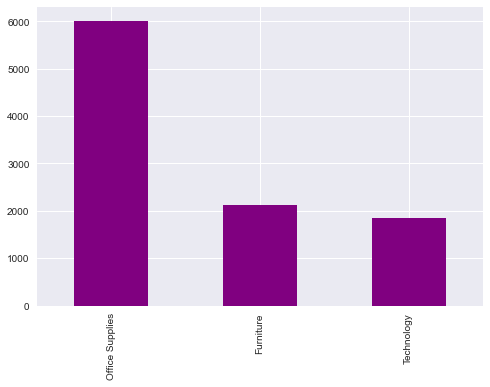

In [29]:
sample['Category'].value_counts().plot(kind='bar',color='purple')

<AxesSubplot:xlabel='Segment'>

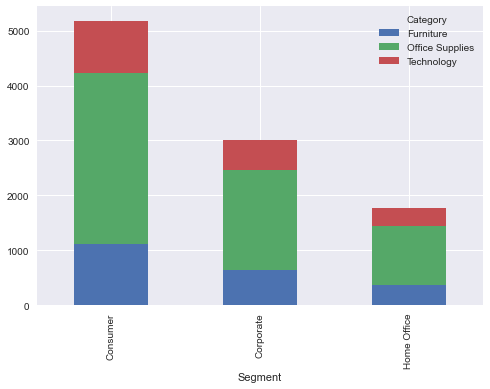

In [30]:
pd.crosstab(sample['Segment'],sample['Category']).plot(kind='bar', stacked=True)

<font size='4'>In every category office supplies have maximum sale.</font>

<AxesSubplot:xlabel='Category'>

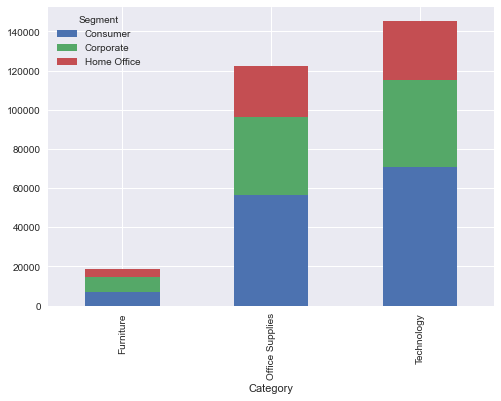

In [38]:
pd.crosstab(index=sample['Category'],columns=sample['Segment'],values=sample['Profit'],aggfunc='sum').plot(kind='bar', stacked=True)

<font size='4'>Eventhough office supplies have maximum sales most of the profit comes from Technology.</font>

<AxesSubplot:>

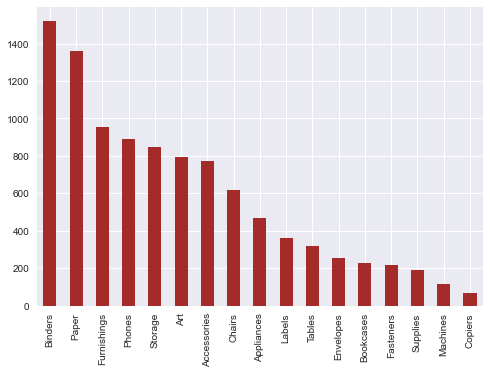

In [27]:
#profit in sub-category
sample['Sub-Category'].value_counts().plot(kind='bar',color='brown')

<font size='4'>Highest sold in sub-category is binders and least being Copiers.</font>

<AxesSubplot:xlabel='Sub-Category'>

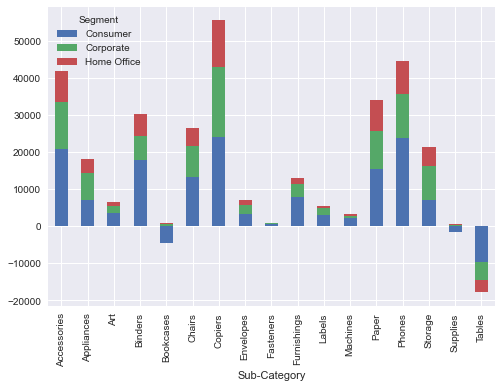

In [55]:
pd.crosstab(index=sample['Sub-Category'],columns=sample['Segment'],values=sample['Profit'],aggfunc='sum').plot(kind='bar', stacked=True)

<font size='4'>Highest profit is from Copiers</font>

<AxesSubplot:xlabel='Category'>

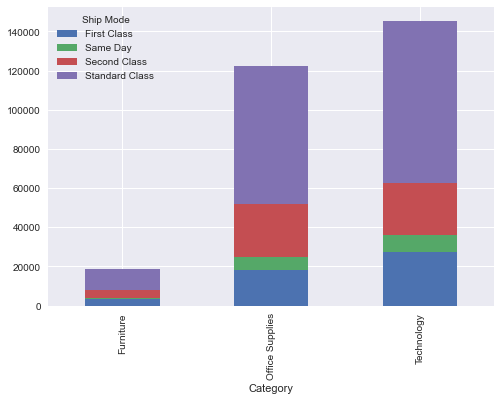

In [40]:
pd.crosstab(index=sample['Category'],columns=sample['Ship Mode'],values=sample['Profit'],aggfunc='sum').plot(kind='bar', stacked=True)

<font size='4'>Hight profit when ship mode is Standard Class.</font>

<font size='4'>Least or negligible profit when ship mode is Same day.</font>

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

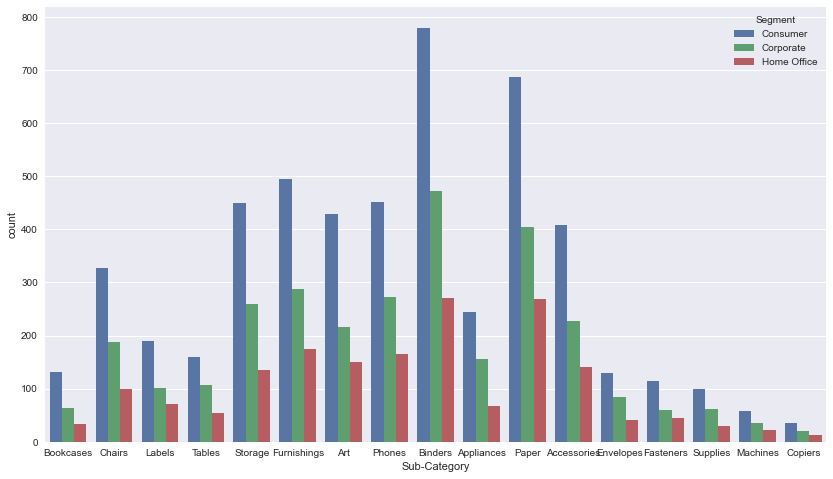

In [45]:
plt.figure(figsize=(14,8))
sns.countplot(x='Sub-Category',hue='Segment',data=sample)

<font size='5'>Summary of all sales</font>

In [54]:
fig=px.sunburst(sample,path=['Country','Category','Sub-Category'],values='Sales',color='Category',hover_data=['Sales','Quantity','Profit'])
fig.update_layout(height=550)
fig.show()

<font size='5'>_CONCLUSIONS_</font>

<font size='4'>-Discounts above 30% reduces profit.</font>

<font size='4'>-The least selling Copiers give maximum profit. </font>

<font size='4'>-Eventhough the more selling category is office supplies, maximum profit comes from Technology.</font>

<font size='4'>-Profit from furniture section is very low.</font>

<font size='4'>-Standard Class shipping mode has highest profit.</font>

<font size='5'>_SUGGESTIONS_</font>

<font size='4'>-Keep the discount rate below or equal to 30%.</font>

<font size='4'>-Reduce the sales of furniture or increase the price of these items.</font>

<font size='4'>-Increase the sale of Copiers to get more profit.</font>

<font size='4'>-Increase sales in Technology.</font>

<font size='4'>-Promote standard shipping more or increase the cost of same day shipping.</font>